# Bank Customer Churn Data

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',100)

1. RowNumber—corresponds to the record (row) number and has no effect on the output.
2. CustomerId—contains random values and has no effect on customer leaving the bank.
3. Surname—the surname of a customer has no impact on their decision to leave the bank.
4. CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
5. Geography—a customer’s location can affect their decision to leave the bank.
6. Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.
7. Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
8. Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
9. Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
10. NumOfProducts—refers to the number of products that a customer has purchased through the bank.
11. HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
12. IsActiveMember—active customers are less likely to leave the bank.
13. EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
14. Exited—whether or not the customer left the bank.
15. Complain—customer has complaint or not.
16. Satisfaction Score—Score provided by the customer for their complaint resolution.
17. Card Type—type of card hold by the customer.
18. Points Earned—the points earned by the customer for using credit card.

### Loading the data

In [2]:
# loading the data

df = pd.read_csv('Customer-Churn-Records.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [3]:
# dropping unnecessary columns

df.drop(columns= ['RowNumber', 'Surname'], inplace = True)

In [4]:
# first five rows

df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [5]:
# size of the dataframe

df.shape

(10000, 16)

In [24]:
# overall information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CustomerId         10000 non-null  int64   
 1   CreditScore        10000 non-null  int64   
 2   Geography          10000 non-null  object  
 3   Gender             10000 non-null  object  
 4   Age                10000 non-null  int64   
 5   Tenure             10000 non-null  int64   
 6   Balance            10000 non-null  float64 
 7   NumOfProducts      10000 non-null  category
 8   HasCrCard          10000 non-null  category
 9   IsActiveMember     10000 non-null  category
 10  EstimatedSalary    10000 non-null  float64 
 11  Exited             10000 non-null  category
 12  Complain           10000 non-null  category
 13  SatisfactionScore  10000 non-null  category
 14  CardType           10000 non-null  object  
 15  PointEarned        10000 non-null  int64   
dtypes: ca

In [28]:
# changing the data type

df['NumOfProducts'] = df['NumOfProducts'].astype('str')
df['HasCrCard'] = df['HasCrCard'].astype('str')
df['IsActiveMember'] = df['IsActiveMember'].astype('str')
df['Exited'] = df['Exited'].astype('str')
df['Complain'] = df['Complain'].astype('str')
df['SatisfactionScore'] = df['SatisfactionScore'].astype('category')


In [8]:
# Rename column names

df.rename(columns = {'Satisfaction Score': 'SatisfactionScore', 'Card Type': 'CardType', 'Point Earned': 'PointEarned'}, inplace = True)

In [9]:
# descriptive statistics of the numerical data

df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,EstimatedSalary,PointEarned
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,100090.239881,606.515100
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,57510.492818,225.924839
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,11.580000,119.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,51002.110000,410.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,100193.915000,605.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,149388.247500,801.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,199992.480000,1000.000000


In [10]:
# searching for the null or missing values

df.isnull().sum()

CustomerId           0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Complain             0
SatisfactionScore    0
CardType             0
PointEarned          0
dtype: int64

In [11]:
# searching for the duplicate rows in the dataframe

df.duplicated().sum()

0

### Univariate Analysis

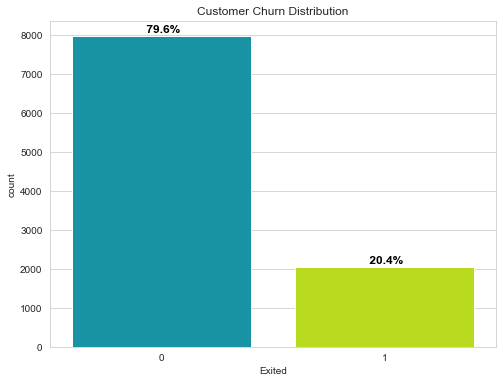

In [12]:
# Distribution of the Target variable (Exited)

# Setting style
sns.set_style("whitegrid")

# Create countplot
plt.figure(figsize=(8,6))
ax = sns.countplot(x='Exited', data=df, palette='nipy_spectral')

# Get total count of values
total = len(df)

# Add percentage labels over bars
for p in ax.patches:
    count = p.get_height() # get bar height
    percentage = f'{100 * count/total: .1f}%' # Calculate Percentage
    x = p.get_x() + p.get_width()/2
    y = count + 100
    ax.text(x, y, percentage, ha='center', fontsize=12, fontweight='bold', color='black')
    

# Add title
plt.title('Customer Churn Distribution') 

# Show plot 
plt.show()


In [13]:
df.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Complain', 'SatisfactionScore',
       'CardType', 'PointEarned'],
      dtype='object')

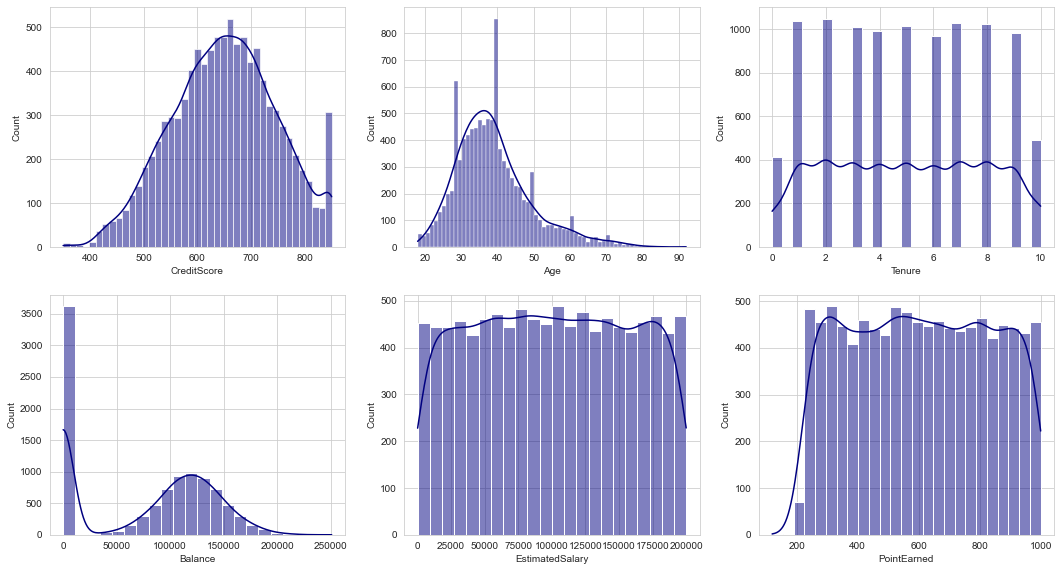

In [14]:
# Distribution of Numerical Features

num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'PointEarned']

plt.figure(figsize=(18, 15))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3,3,i)
    sns.histplot(data=df, x=df[col], kde=True, color='navy')
    
plt.show()

1. CreditScore: The distribution appears to be approximately normal, with most values concentrated between 400 and 800.

2. Age: The distribution is right-skewed, with most customers falling in the age range of 30 to 50. There are a few extreme values in the higher age range.

3. Tenure: The distribution appears to be almost uniform, indicating that tenure is evenly distributed among customers.

4. Balance: A significant portion of customers have a balance of zero, indicating that many customers do not maintain a balance in their accounts. Among those who do, there are peaks around 100000 and 150000.

5. NumOfProducts: Most customers hold either 1 or 2 products, with fewer customers having 3 or 4. The distribution shows sharp peaks at these discrete values.

6. EstimatedSalary: The distribution is nearly uniform, suggesting that salaries are evenly spread across different values.

7. Point Earned: The distribution is nearly uniform.

### Bivariate Analysis

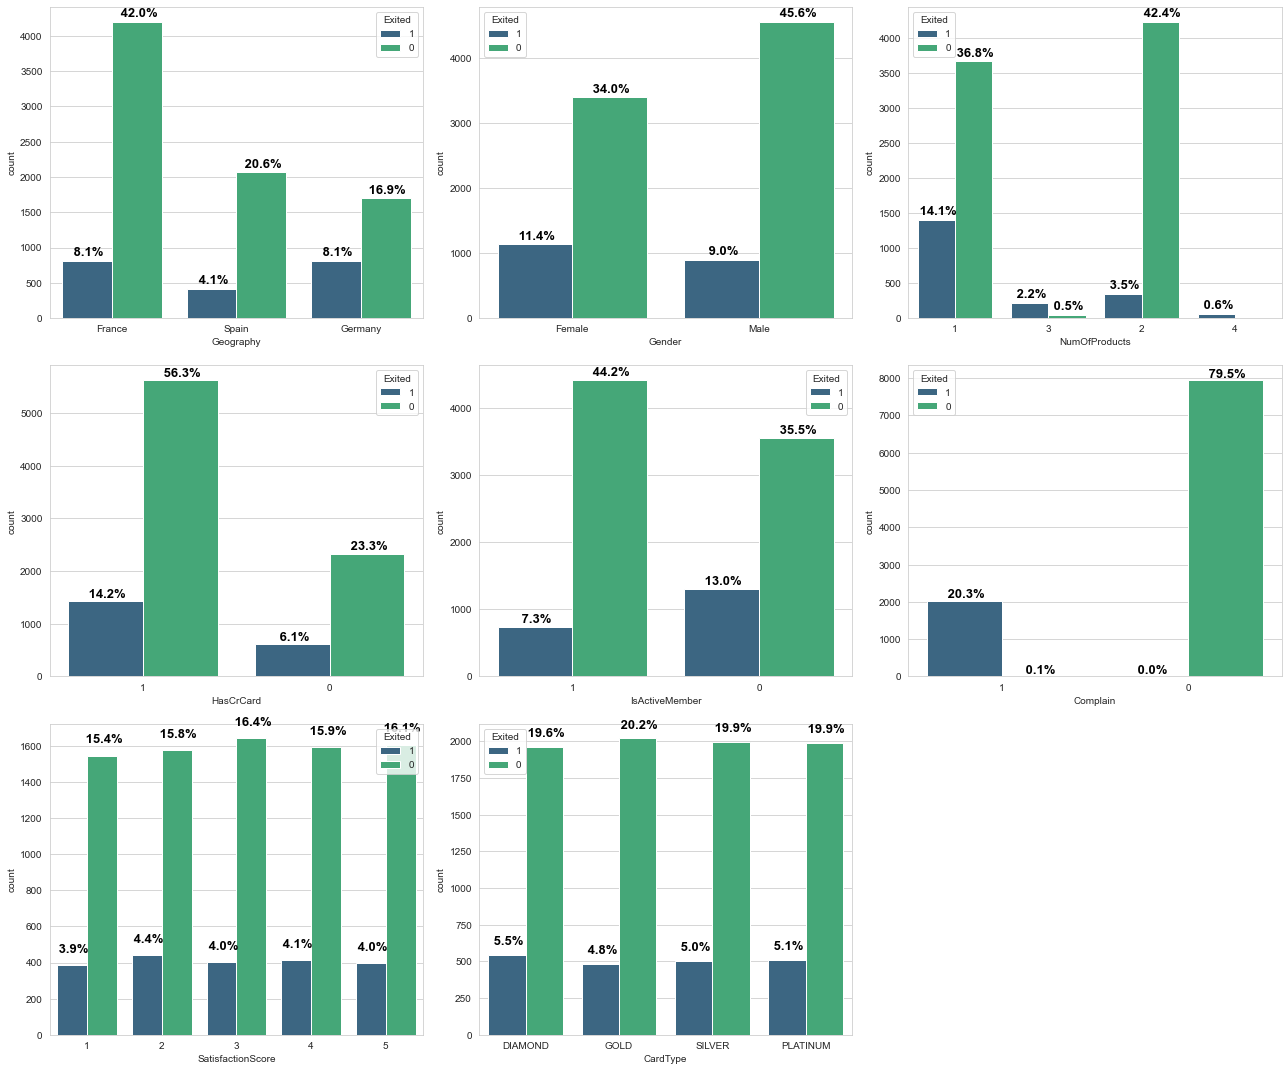

In [53]:
# Bivariate analysis between Churn and Categorical features

cat_cols = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 
            'IsActiveMember', 'Complain', 'SatisfactionScore', 'CardType']

plt.figure(figsize=(18, 15))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)  # Ensure it does not exceed the number of plots

    # Drop NaN values before plotting
    df_clean = df.dropna(subset=[col, 'Exited'])
    
    # Countplot
    ax = sns.countplot(data=df_clean, x=col, palette='viridis', hue='Exited')

    # Get total count of values
    total = len(df_clean[col].dropna())

    # Add percentage labels over bars
    for p in ax.patches:
        count = p.get_height()
        if np.isfinite(count) and count > 0:  # Ensure count is finite
            percentage = f'{100 * count / total: .1f}%'
            x = p.get_x() + p.get_width() / 2
            y = count + 70
            ax.text(x, y, percentage, ha='center', fontsize=13, 
                    fontweight='bold', color='black')

plt.tight_layout()  
plt.show()


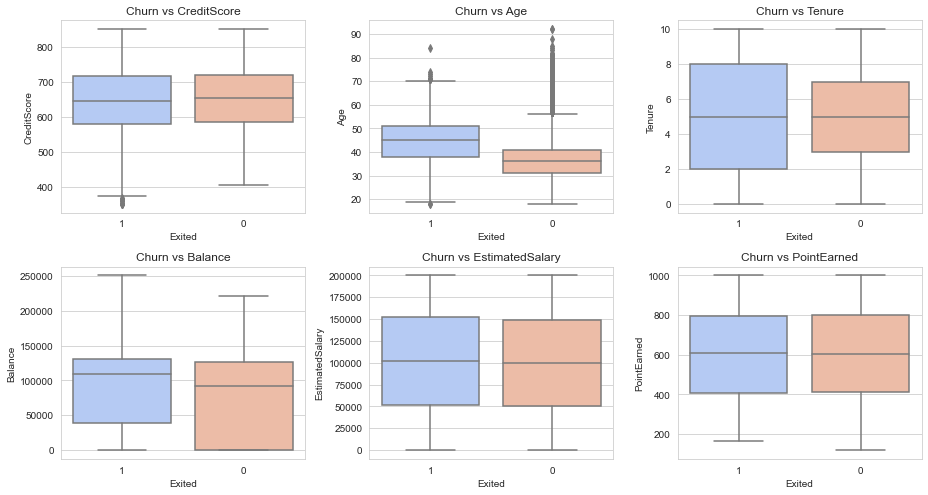

In [59]:
# Bivariate analysis between Churn and Numerical columns

plt.figure(figsize=(13, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Exited', y=col, data=df, palette='coolwarm')
    plt.title(f'Churn vs {col}')
plt.tight_layout()
plt.show()

### Multivariate Analysis

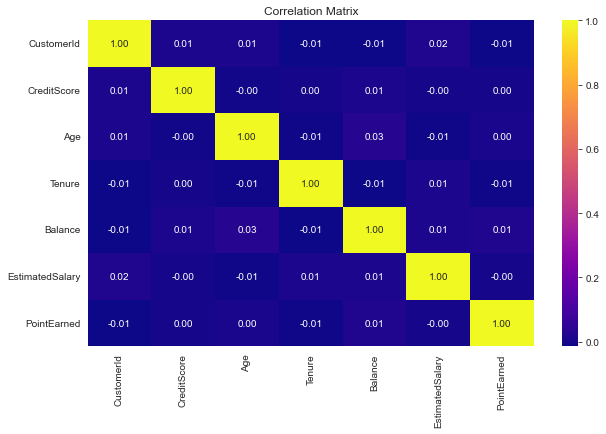

In [63]:
# Lets plot correlation matrix

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='plasma', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Question & Answer

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CustomerId         10000 non-null  int64   
 1   CreditScore        10000 non-null  int64   
 2   Geography          10000 non-null  object  
 3   Gender             10000 non-null  object  
 4   Age                10000 non-null  int64   
 5   Tenure             10000 non-null  int64   
 6   Balance            10000 non-null  float64 
 7   NumOfProducts      10000 non-null  object  
 8   HasCrCard          10000 non-null  object  
 9   IsActiveMember     10000 non-null  object  
 10  EstimatedSalary    10000 non-null  float64 
 11  Exited             10000 non-null  object  
 12  Complain           10000 non-null  object  
 13  SatisfactionScore  10000 non-null  category
 14  CardType           10000 non-null  object  
 15  PointEarned        10000 non-null  int64   
dtypes: ca

#### 1. What is the Over all Churn Rate?

In [68]:
df['Exited_numerical'] = df['Exited'].astype(int)

In [76]:
churn_rate = (df['Exited_numerical'].sum() / len(df)) * 100
print(f"Overall Churn Rate: {churn_rate:.2f}%")

Overall Churn Rate: 20.38%


#### 2. What age group has most churn rate?

       Total Customers  Churned Customers  Churn Rate (%)
18-29             1641                124        7.556368
30-39             4346                473       10.883571
40-49             2618                807       30.825057
50-59              869                487       56.041427
60+                526                147       27.946768


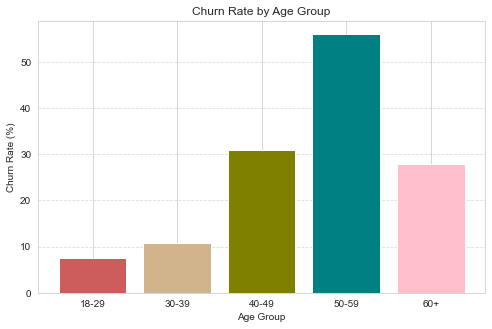

In [80]:
bins = [18, 30, 40, 50, 60, 100] # Age ranges
labels = ['18-29','30-39','40-49','50-59','60+']

df['Age_Groups'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

age_churn_counts = df.groupby('Age Group')['Exited_numerical'].sum()  # Churned customers count
age_total_counts = df['Age Group'].value_counts().sort_index()  # Total customers in each age group

# Churn Rate Calculate
age_churn_rate = (age_churn_counts / age_total_counts) * 100

# Print Results
age_churn_df = pd.DataFrame({'Total Customers': age_total_counts, 'Churned Customers': age_churn_counts, 'Churn Rate (%)': age_churn_rate})
print(age_churn_df)

# Bar Chart
plt.figure(figsize=(8,5))
plt.bar(age_churn_rate.index, age_churn_rate, color=['indianred', 'tan', 'olive', 'teal', 'pink'])
plt.xlabel("Age Group")
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate by Age Group")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### 3. What is the minimum, average and maximum credit score of the customers who are churning?

In [83]:
churned_customers = df[df['Exited_numerical'] == 1]

min_credit_score = churned_customers['CreditScore'].min()
avg_credit_score = churned_customers['CreditScore'].mean()
max_credit_score = churned_customers['CreditScore'].max()

print(f"🔹 Minimum Credit Score (Churned Customers): {min_credit_score}")
print(f"🔹 Average Credit Score (Churned Customers): {avg_credit_score:.2f}")
print(f"🔹 Maximum Credit Score (Churned Customers): {max_credit_score}")

🔹 Minimum Credit Score (Churned Customers): 350
🔹 Average Credit Score (Churned Customers): 645.41
🔹 Maximum Credit Score (Churned Customers): 850


#### 4. Which county has the maximum churn rate?

France     16.174711
Germany    32.443204
Spain      16.673395
Name: Geography, dtype: float64


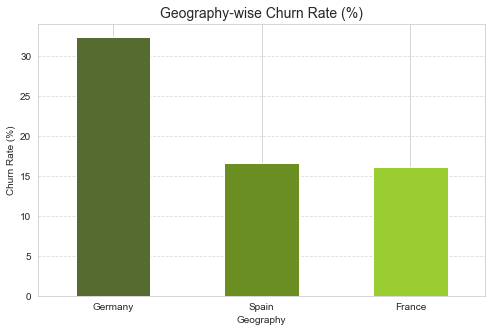

In [88]:
# Country-wise churned customers count
churn_by_country = df[df['Exited_numerical'] == 1]['Geography'].value_counts()

# Total customers in each country
total_customers_by_country = df['Geography'].value_counts()

# Churn Rate Calculation
churn_rate_by_country = (churn_by_country / total_customers_by_country) * 100
print(churn_rate_by_country)

# Bar Plot
plt.figure(figsize=(8, 5))
churn_rate_by_country.sort_values(ascending=False).plot(kind='bar', color=['darkolivegreen', 'olivedrab', 'yellowgreen'])
plt.title("Geography-wise Churn Rate (%)", fontsize=14)
plt.ylabel("Churn Rate (%)")
plt.xlabel("Geography")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### 5. Which gender has more churn rate?

Female    25.071539
Male      16.474253
Name: Gender, dtype: float64


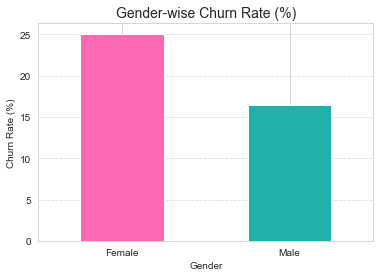

In [90]:
# Gender-wise churned customers count
churn_by_gender = df[df['Exited_numerical'] == 1]['Gender'].value_counts()

# Total customers in each gender
total_customers_by_gender = df['Gender'].value_counts()

# Churn Rate Calculation
churn_rate_by_gender = (churn_by_gender / total_customers_by_gender) * 100
print(churn_rate_by_gender)

# Bar Plot
plt.figure(figsize=(6, 4))
churn_rate_by_gender.sort_values(ascending=False).plot(kind='bar', color=['hotpink', 'lightseagreen'])
plt.title("Gender-wise Churn Rate (%)", fontsize=14)
plt.ylabel("Churn Rate (%)")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### 6. What is the churn rate of new, mid and loyal customers

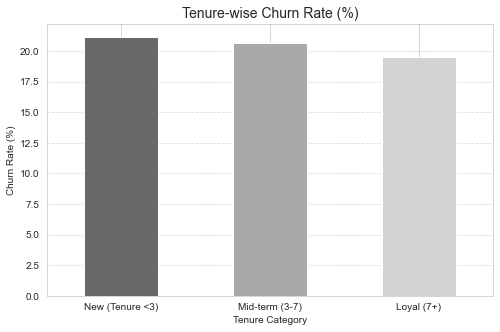

Churn Rate by Tenure Category:
Mid-term (3-7)     20.64
Loyal (7+)         19.54
New (Tenure <3)    21.15
Name: Tenure Category, dtype: float64


In [94]:
# Define tenure categories
def tenure_category(tenure):
    if tenure < 3:
        return "New (Tenure <3)"
    elif 3 <= tenure < 7:
        return "Mid-term (3-7)"
    else:
        return "Loyal (7+)"

df['Tenure Category'] = df['Tenure'].apply(tenure_category)

# Tenure-wise churned customers count
churn_by_tenure = df[df['Exited_numerical'] == 1]['Tenure Category'].value_counts()

# Step 3: Total customers in each tenure category
total_customers_by_tenure = df['Tenure Category'].value_counts()

# Step 4: Churn Rate Calculation
churn_rate_by_tenure = (churn_by_tenure / total_customers_by_tenure) * 100

# Step 5: Visualization (Bar Plot)
plt.figure(figsize=(8, 5))
churn_rate_by_tenure.sort_values(ascending=False).plot(kind='bar', color=['dimgrey', 'darkgrey', 'lightgrey'])
plt.title("Tenure-wise Churn Rate (%)", fontsize=14)
plt.ylabel("Churn Rate (%)")
plt.xlabel("Tenure Category")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print churn rates
print("Churn Rate by Tenure Category:")
print(churn_rate_by_tenure.round(2))

#### 7. Are inactive customers churning more?

0    1303
1     735
Name: IsActiveMember, dtype: int64
1    5151
0    4849
Name: IsActiveMember, dtype: int64


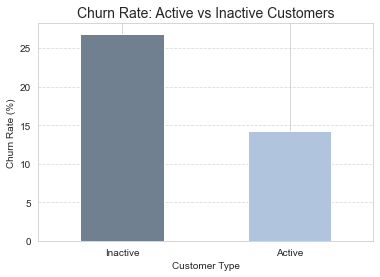

Churn Rate by Activity Status:
0    26.87
1    14.27
Name: IsActiveMember, dtype: float64


In [96]:

# Active vs Inactive customers count
churn_by_activity = df[df['Exited_numerical'] == 1]['IsActiveMember'].value_counts()
print(churn_by_activity)
total_customers_by_activity = df['IsActiveMember'].value_counts()
print(total_customers_by_activity)

# Churn Rate Calculation
churn_rate_by_activity = (churn_by_activity / total_customers_by_activity) * 100

# Step 3: Visualization (Bar Plot)
plt.figure(figsize=(6, 4))
churn_rate_by_activity.sort_index().plot(kind='bar', color=['slategrey', 'lightsteelblue'])
plt.xticks(ticks=[0, 1], labels=['Inactive', 'Active'], rotation=0)
plt.title("Churn Rate: Active vs Inactive Customers", fontsize=14)
plt.ylabel("Churn Rate (%)")
plt.xlabel("Customer Type")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print churn rates
print("Churn Rate by Activity Status:")
print(churn_rate_by_activity.round(2))

#### 8. Customer with high balance and high salary vs Churn rate

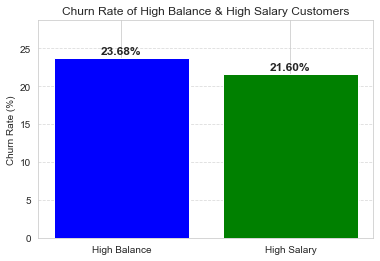

High Balance Customers Churn Rate: 23.68%
High Salary Customers Churn Rate: 21.60%


In [98]:

# High Balance and High Salary customers (Top 25% customers)
high_balance_threshold = df['Balance'].quantile(0.75)  # Top 25% threshold
high_salary_threshold = df['EstimatedSalary'].quantile(0.75)  # Top 25% threshold

# top 25% customers
high_balance_customers = df[df['Balance'] >= high_balance_threshold]
high_salary_customers = df[df['EstimatedSalary'] >= high_salary_threshold]

# Calculate churn rate for both categories
high_balance_churn_rate = (high_balance_customers['Exited_numerical'].sum() / len(high_balance_customers)) * 100
high_salary_churn_rate = (high_salary_customers['Exited_numerical'].sum() / len(high_salary_customers)) * 100

# barplot
labels = ['High Balance', 'High Salary']
churn_rates = [high_balance_churn_rate, high_salary_churn_rate]

plt.figure(figsize=(6, 4))
plt.bar(labels, churn_rates, color=['blue', 'green'])
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate of High Balance & High Salary Customers")
plt.ylim(0, max(churn_rates) + 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display Churn Rates on Bars
for i, rate in enumerate(churn_rates):
    plt.text(i, rate + 0.5, f"{rate:.2f}%", ha='center', fontsize=12, fontweight='bold')

plt.show()

# Print churn rates
print(f"High Balance Customers Churn Rate: {high_balance_churn_rate:.2f}%")
print(f"High Salary Customers Churn Rate: {high_salary_churn_rate:.2f}%")

#### 9. Low Balance + High NumOfProducts VS churn rate

In [100]:
low_balance_threshold = df['Balance'].quantile(0.25)
high_products_threshold = 2  

# Filter low balance + high products customers
low_balance_high_products = df[(df['Balance'] <= low_balance_threshold) & 
                               (df['NumOfProducts'].astype(int) >= high_products_threshold)]

# Churn Rate Calculate
churn_rate = (low_balance_high_products['Exited_numerical'].sum() / len(low_balance_high_products)) * 100

print(f"Low Balance + High NumOfProducts wale logon ka churn rate: {churn_rate:.2f}%")


Low Balance + High NumOfProducts wale logon ka churn rate: 5.97%


#### 10. low credit score + inactive member vs churn rate

In [103]:
low_credit_threshold = df['CreditScore'].quantile(0.25)  # 25th percentile (Q1)

# Filter customers with low credit score + inactive status
low_credit_inactive = df[(df['CreditScore'] <= low_credit_threshold) & (df['IsActiveMember'].astype(int) == 0)]

# Calculate Churn Rate
churn_rate = (low_credit_inactive['Exited_numerical'].sum() / len(low_credit_inactive)) * 100

print(f"Low Credit Score + Inactive Members ka Churn Rate: {churn_rate:.2f}%")

Low Credit Score + Inactive Members ka Churn Rate: 28.26%
